In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def get_vacuum(fname):
    try:
        f = open(fname,"r")
    except:
        raise FileNotFoundError(fname)
    line = f.readline()
    while line != '':
        if 'vacuum' in line:
            vacuum = float(line.split()[-2])
            return vacuum
        else:
            line = f.readline()
def get_eqp_homo_lumo_gap(fname):
    try:
        f = open(fname,"r")
    except:
        raise FileNotFoundError(fname)  
    f.readline();
    f.readline();
    line = f.readline()
    homo = float(line.split()[5])
    line = f.readline()
    lumo = float(line.split()[5])
    return homo,lumo,lumo-homo
def model_func(x,a,b):
    return a+b/x

## Figure 1: characteristics of eigenpotentials

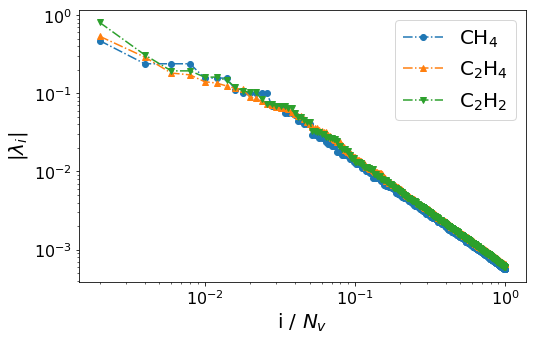

In [3]:
def get_wstat_eigenvalues(fname):
    eigens = []
    try:
        f = open(fname,'r')
    except:
        raise FileNotFoundError(fname)
    f.readline()
    line = f.readline()
    while line != '':
        eigens.append(float(line.split()[1]))
        line = f.readline()
    return eigens

markers = ['o','^','v','P','*']
moles = ['CH4', 'C2H4', 'C2H2']
Nv = [4,6,5]
labels = [r'$\mathrm{CH_4}$',r'$\mathrm{C_2H_4}$',r'$\mathrm{C_2H_2}$']
eigenvals = []
for m in moles:
    fname = '%s-PBE/wstat/o-wstat.converged.tab'%m
    eigenvals.append(get_wstat_eigenvalues(fname))

eigenvals = np.array(eigenvals)
fig = plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for i in range(len(moles)):
    plt.loglog(np.arange(1,1+len(eigenvals[i]))/len(eigenvals[i]),-eigenvals[i]/Nv[i],label=labels[i],ls='-.',marker=markers[i])
plt.legend(fontsize=20)
plt.xlabel(r'i / $N_v$',fontsize=20)
plt.ylabel(r'$|\lambda_i|$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_yscale('log')
plt.show()
fig.savefig("fig/eigenvals.png",bbox_inches='tight',dpi=200)

## Figure 2. Example of extrapolation

-14.0135977776 8.69952298304


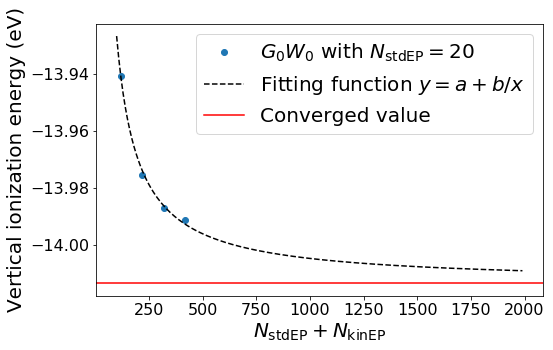

0.03933891


In [8]:
for m in ['CH4']:
    x = []
    y = []
    vacuum = get_vacuum("./%s-PBE/pw/%s.out"%(m,m.lower()))
    prefix = "./%s-PBE/wfreq"%m
    for i in range(100,401,100):
        fname = prefix+"/kin-20/kin-20-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        x.append(20+i)
        y.append(homo-vacuum)
    p,q = curve_fit(model_func,x,y)
    print(p[0],p[1])
    xx = np.arange(100,2000,10)
    
    fig = plt.figure(figsize=(8,5))
    ax = plt.subplot(111)
    plt.plot(x,y,'o',c='C0',label=r'$G_0W_0$ with $N_\mathrm{stdEP}=20$')
    plt.plot(xx,model_func(xx,*p),'--k',label=r'Fitting function $y = a+b/x$')
    ax.axhline(y=p[0],c='r',label='Converged value')
    plt.legend(fontsize=20)
    plt.xlabel(r'$N_\mathrm{stdEP}+N_\mathrm{kinEP}$',fontsize=20)
    plt.ylabel('Vertical ionization energy (eV)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()
    print(vacuum)
    fig.savefig('Fitting_example_of_CH4.png',bbox_inches='tight',dpi=200)

## Table 1. summarize G2_97 results

In [45]:
moles = ['C2H2', 'C2H4', 'C4H4S', 'C6H6', 'CH3Cl', 
        'CH3OH', 'CH3SH', 'CH4', 'Cl2', 'ClF', 'CO', 
        'CO2', 'CS', 'F2', 'H2CO', 'H2O', 'H2O2', 
        'HCl', 'HCN','Na2'] 
refVIP = {'C2H2':11.10, 'C2H4':10.35, 'C4H4S':8.90, 'C6H6':9.10,
          'CH3Cl':11.27, 'CH3OH':10.47, 'CH3SH':9.31, 'CH4':13.99,
          'Cl2':11.48, 'ClF':12.47, 'CO':13.45, 'CO2':13.31,
          'CS':10.92, 'F2':14.90, 'H2CO':10.38, 'H2O':11.81,
          'H2O2':10.96, 'HCl':12.54, 'HCN':13.30, 'Na2':4.73}
refVEA = {'C2H2':-2.495, 'C2H4':-1.798, 'C4H4S':np.nan, 'C6H6':-0.930,
          'CH3Cl':np.nan, 'CH3OH':-0.909, 'CH3SH':np.nan, 'CH4':-0.761,
          'Cl2':1.381, 'ClF':np.nan, 'CO':-0.438, 'CO2':-0.974,
          'CS':0.495, 'F2':1.059, 'H2CO':-0.764, 'H2O':-0.911,
          'H2O2':-1.796, 'HCl':-1.092, 'HCN':-2.250, 'Na2':0.613}

In [46]:
eqp = []
for m in moles:
    vacuum = get_vacuum("./%s-PBE/pw/%s.out"%(m,m.lower()))
    prefix = "./%s-PBE/wfreq"%m
    for i in range(100,401,100):
        fname = prefix+"/kin-20/kin-20-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        eqp.append((m,20,i,homo-vacuum,lumo-vacuum,gap))
    for i in range(100,401,100):
        fname = prefix+"/kin-100/kin-100-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        eqp.append((m,100,i,homo-vacuum,lumo-vacuum,gap))
    for i in range(200,501,100):
        fname = prefix+"/std-%d/o-eqp.converged.tab"%i
        homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
        eqp.append((m,i,0,homo-vacuum,lumo-vacuum,gap))

#     for i in range(120,500,100):
#         fname = prefix+"/std-%d/o-eqp.converged.tab"%i
#         homo,lumo,gap = get_eqp_homo_lumo_gap(fname)
#         eqp.append((m,i,0,homo-vacuum,lumo-vacuum,gap))


# print(eqp)
eqp = np.array(eqp,dtype=[('mol','<U32'),('std',np.int),('kin',np.int),('homo',np.float),('lumo',np.float),('gap',np.float)])
eqp_df = pd.DataFrame(eqp,columns=['mol','std','kin','homo','lumo','gap'])

In [47]:
eqp_interp = []
for i in range(0,len(eqp),4):
    mol = eqp['mol'][i]
    tmpstd = eqp['std'][i:i+4]
    tmpkin = eqp['kin'][i:i+4]
    tmphomo = eqp['homo'][i:i+4]
    tmplumo = eqp['lumo'][i:i+4]
    popt,popv = curve_fit(model_func,tmpstd+tmpkin,tmphomo)
    homo = popt[0]
    popt,popv = curve_fit(model_func,tmpstd+tmpkin,tmplumo)
    lumo = popt[0]
    eqp_interp.append((mol,homo,lumo,lumo-homo))

In [38]:
eqp_interp

[('C2H2', -11.024627279205873, 2.4691650415039867, 13.49379232070986),
 ('C2H2', -11.030912982557432, 2.4487980373731393, 13.479711019930571),
 ('C2H2', -11.030946804348748, 2.4483427932901205, 13.479289597638868),
 ('C2H4', -10.362989969861829, 1.8180925545710866, 12.181082524432915),
 ('C2H4', -10.364800229944123, 1.7880060536570554, 12.152806283601178),
 ('C2H4', -10.364918587372433, 1.7872918034266092, 12.152210390799041),
 ('C4H4S', -8.6951179331566273, 0.98738960628873618, 9.6825075394453641),
 ('C4H4S', -8.6847621873192669, 0.90277785862831161, 9.5875400459475788),
 ('C4H4S', -8.6825539089090835, 0.8988826035737556, 9.5814365124828385),
 ('C6H6', -9.0527276481193475, 1.1510804969928057, 10.203808145112154),
 ('C6H6', -9.0481631202013748, 1.0692487433099374, 10.117411863511313),
 ('C6H6', -9.0463053924800967, 1.0643464866303585, 10.110651879110454),
 ('CH3Cl', -11.21119574280976, 1.2146357853017171, 12.425831528111477),
 ('CH3Cl', -11.20539398495017, 1.1945562804890504, 12.399950

In [48]:
for i in range(0,len(eqp_interp),3):
    # print order : kin20, kin100, std100, without ref
    print("%6s & %6.2f & %6.2f & %6.2f \\\\"%(moles[i//3],-eqp_interp[i][1],-eqp_interp[i+1][1],-eqp_interp[i+2][1]))

  C2H2 &  11.07 &  11.06 &  11.06 \\
  C2H4 &  10.41 &  10.40 &  10.40 \\
 C4H4S &   8.80 &   8.77 &   8.76 \\
  C6H6 &   9.17 &   9.14 &   9.13 \\
 CH3Cl &  11.28 &  11.26 &  11.25 \\
 CH3OH &  10.58 &  10.56 &  10.56 \\
 CH3SH &   9.39 &   9.36 &   9.36 \\
   CH4 &  14.01 &  14.01 &  14.01 \\
   Cl2 &  11.51 &  11.51 &  11.50 \\
   ClF &  12.55 &  12.55 &  12.54 \\
    CO &  13.51 &  13.50 &  13.50 \\
   CO2 &  13.32 &  13.31 &  13.31 \\
    CS &  11.00 &  10.98 &  10.98 \\
    F2 &  14.99 &  14.97 &  14.97 \\
  H2CO &  10.43 &  10.42 &  10.42 \\
   H2O &  11.82 &  11.82 &  11.81 \\
  H2O2 &  10.87 &  10.87 &  10.86 \\
   HCl &  12.50 &  12.50 &  12.50 \\
   HCN &  13.20 &  13.20 &  13.20 \\
   Na2 &   4.95 &   4.95 &   4.95 \\


In [75]:
# for i in range(0,len(eqp_interp),3):
#     print("%6s & %6.2f & %6.2f & %6.2f & %6.2f & %6.2f \\\\"%(moles[i//4],-eqp_interp[i][2],-eqp_interp[i+1][2],-eqp_interp[i+2][2],-eqp_interp[i+3][2],refVEA[moles[i//4]]))
# #     print(eqp_interp[i][1])

for i in range(0,len(eqp_interp),3):
    # print order : kin20, kin100, std100, without ref
    print("%6s & %6.2f & %6.2f & %6.2f \\\\"%(moles[i//3],-eqp_interp[i][2],-eqp_interp[i+1][2],-eqp_interp[i+2][2]))

  C2H2 &  -2.42 &  -2.41 &  -2.41 \\
  C2H4 &  -1.75 &  -1.75 &  -1.75 \\
 C4H4S &  -0.85 &  -0.81 &  -0.80 \\
  C6H6 &  -1.01 &  -0.96 &  -0.96 \\
 CH3Cl &  -1.17 &  -1.16 &  -1.16 \\
 CH3OH &  -0.89 &  -0.89 &  -0.89 \\
 CH3SH &  -0.88 &  -0.88 &  -0.88 \\
   CH4 &  -0.64 &  -0.64 &  -0.64 \\
   Cl2 &   1.65 &   1.64 &   1.65 \\
   ClF &   1.28 &   1.28 &   1.28 \\
    CO &  -1.56 &  -1.57 &  -1.57 \\
   CO2 &  -0.97 &  -0.97 &  -0.97 \\
    CS &   0.49 &   0.51 &   0.51 \\
    F2 &   1.16 &   1.16 &   1.16 \\
  H2CO &  -0.69 &  -0.68 &  -0.68 \\
   H2O &  -0.90 &  -0.90 &  -0.90 \\
  H2O2 &  -1.80 &  -1.79 &  -1.79 \\
   HCl &  -1.07 &  -1.07 &  -1.07 \\
   HCN &  -2.08 &  -2.08 &  -2.08 \\
   Na2 &   0.64 &   0.63 &   0.63 \\


## Time usage

In [28]:
moles = ['C2H2', 'C2H4', 'C4H4S', 'C6H6', 'CH3Cl', 
        'CH3OH', 'CH3SH', 'CH4', 'Cl2', 'ClF', 'CO', 
        'CO2', 'CS', 'F2', 'H2CO', 'H2O', 'H2O2', 
        'HCl', 'HCN','Na2']

def string2sec(s):
    hour = 0
    minute = 0
    second = 0
    beg = 0
    end = 0
    for i in range(len(s)):
        if s[i] == 'h':
            end = i
            hour = float(s[beg:end])
            beg = i+1
        elif s[i] == 'm':
            end = i
            minute = float(s[beg:end])
            beg = i+1
        elif s[i] == 's':
            end = i
            second = float(s[beg:end])
    return 3600*hour+60*minute+second

def get_wall_time(fname):
    time = 0.0
    with open(fname,'r') as f:
        lines = f.readlines()
        time = string2sec(lines[-8][34:46])
    return time

# 20 stdEPs
### wstat calculation time
kin20 = []
for mol in moles:
    fname = '%s-PBE/wstat/%s_20_400.out'%(mol,mol.lower())
    kin20.append(get_wall_time(fname))

### wfreq calculation time
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = '%s-PBE/wfreq/kin-20/kin-20-%d/kin-20-%d.out'%(moles[im],i,i)
        kin20[im] += get_wall_time(fname)
         
# 100 stdEPs
kin100 = []
for mol in moles:
    fname = '%s-PBE/wstat/%s_100_400.out'%(mol,mol.lower())
    kin100.append(get_wall_time(fname))
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = '%s-PBE/wfreq/kin-100/kin-100-%d/kin-100-%d.out'%(moles[im],i,i)
        kin100[im] += get_wall_time(fname)
        
# std-120, 220, 320, 420
std20 = []
for mol in moles:
    fname = '%s-PBE/wstat/%s_420.out'%(mol,mol.lower())
    std20.append(get_wall_time(fname))
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = '%s-PBE/wfreq/std-%d/std-%d.out'%(moles[im],20+i,20+i)
        std20[im] += get_wall_time(fname)
        
# std-200,300,400,500
std100 = []
for mol in moles:
    fname = '%s-PBE/wstat/%s_500.out'%(mol,mol.lower())
    std100.append(get_wall_time(fname))
for im in range(len(moles)):
    for i in range(100,401,100):
        fname = '%s-PBE/wfreq/std-%d/std-%d.out'%(moles[im],100+i,100+i)
        std100[im] += get_wall_time(fname)

In [29]:
print(kin20)
print(kin100)
print(std20)
print(std100)

[3289.67, 3928.37, 7621.8099999999995, 6695.289999999999, 3997.46, 3963.25, 3991.14, 2992.57, 4003.92, 3977.25, 3291.1099999999997, 4323.29, 3329.26, 4128.889999999999, 3654.7200000000003, 2968.26, 3994.96, 2972.64, 3339.76, 4506.87]
[4678.65, 5297.17, 13969.18, 9511.43, 5577.49, 5605.889999999999, 5635.639999999999, 4576.469999999999, 5700.110000000001, 5575.66, 4666.25, 6058.820000000001, 4691.99, 5579.85, 5118.32, 4212.48, 5622.34, 4221.6900000000005, 4685.45, 6164.379999999999]
[4069.9700000000003, 4604.15, 14240.650000000001, 8296.779999999999, 4892.7, 5283.0, 4937.13, 3561.18, 5188.389999999999, 5354.709999999999, 3783.17, 5178.950000000001, 4113.76, 4608.650000000001, 4431.18, 3618.97, 4906.36, 3622.41, 4063.58, 4920.07]
[5254.65, 5904.37, 17653.0, 10577.529999999999, 6234.0599999999995, 6238.039999999999, 6342.17, 4588.1900000000005, 6544.79, 6258.0, 4877.36, 6660.23, 5227.389999999999, 6174.639999999999, 5634.36, 4623.25, 5963.09, 4613.57, 5157.1, 6390.039999999999]


In [35]:
print(sum(kin20)/sum(std20))
print(sum(kin20)/sum(std100))
print(sum(kin100)/sum(std100))
# print(sum(kin100)/sum(std20))

0.7809973131617264
0.6184927368982039
0.8948441147262329
